# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Moch. Andyka Saputra
- **Email:** 25andykas@gmail.com
- **ID Dicoding:** andyka

## Menentukan Pertanyaan Bisnis

1. Berapa persentasi perbandingan antara penyewa yang terdaftar dan tidak?
2. Bagaimana pengaruh cuaca terhadap jumlah penyewa sepeda?
3. Kapan waktu terbaik untuk meningkatkan pendapatan penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
df_day = pd.read_csv('data/day,csv')
df_hour = pd.read_csv('data/hour.csv')

Load day data

In [ ]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Load hour data

In [ ]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset berisi informasi tentang penyewaan sepeda bersama yang dipecah menjadi dua tingkat waktu yakni harian dan per jam.
- jumlah total sepeda sewaan (*cnt*) didapat dari *casual* + *registered*
- kedua data memuat detail yang sama, pembeda pada df_hour terdapat hr atau tingkat jam

### Assessing Data

Assesing day data

In [ ]:
df_day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
df_day.duplicated().sum()

0

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


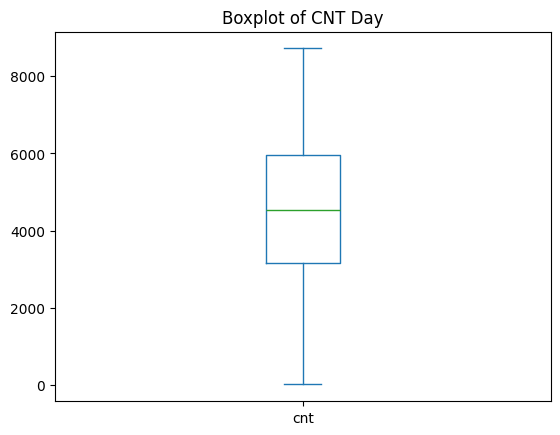

In [ ]:
df_day['cnt'].plot(kind='box')
plt.title('Boxplot of CNT Day')
plt.show()

Assesing hour data

In [ ]:
df_hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
df_hour.duplicated().sum()

0

In [ ]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


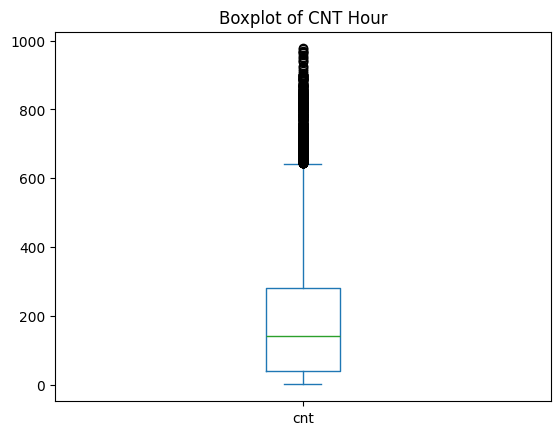

In [ ]:
df_hour['cnt'].plot(kind='box')
plt.title('Boxplot of CNT Hour')
plt.show()

**Insight:**
- Kedua data tidak ada data yang duplikat maupun data kosong
- outlier pada data *day* tidak ada sedangkan pada data *hour* terdapat outlier,tetapi outlier terdapat beberapa data ini kemungkinan memang data tersebut merupakan data sebenarnya
- dteday kita akan ubah ke tipe data datetime

### Cleaning Data

In [ ]:
df_day = df_day.drop(columns=['instant'])
df_hour = df_hour.drop(columns=['instant'])

In [ ]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


In [ ]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

**Insight:**
- Kolom instant dihapus karena tidak relevan dengan analisis
- Tipe data dteday telah diubah dari tipe object ke datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
df_day.describe()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [ ]:
df_hour.describe()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Hasil kedua data menggambarkan

- Terdapat 731 data pada Day dan 17.379 pada Hour
- dteday : Data yang tersedia mulai Januari 2011 - Desember 2012

In [ ]:
print("Total penyewaan sepeda :", df_day['cnt'].sum())

Total penyewaan sepeda : 3292679


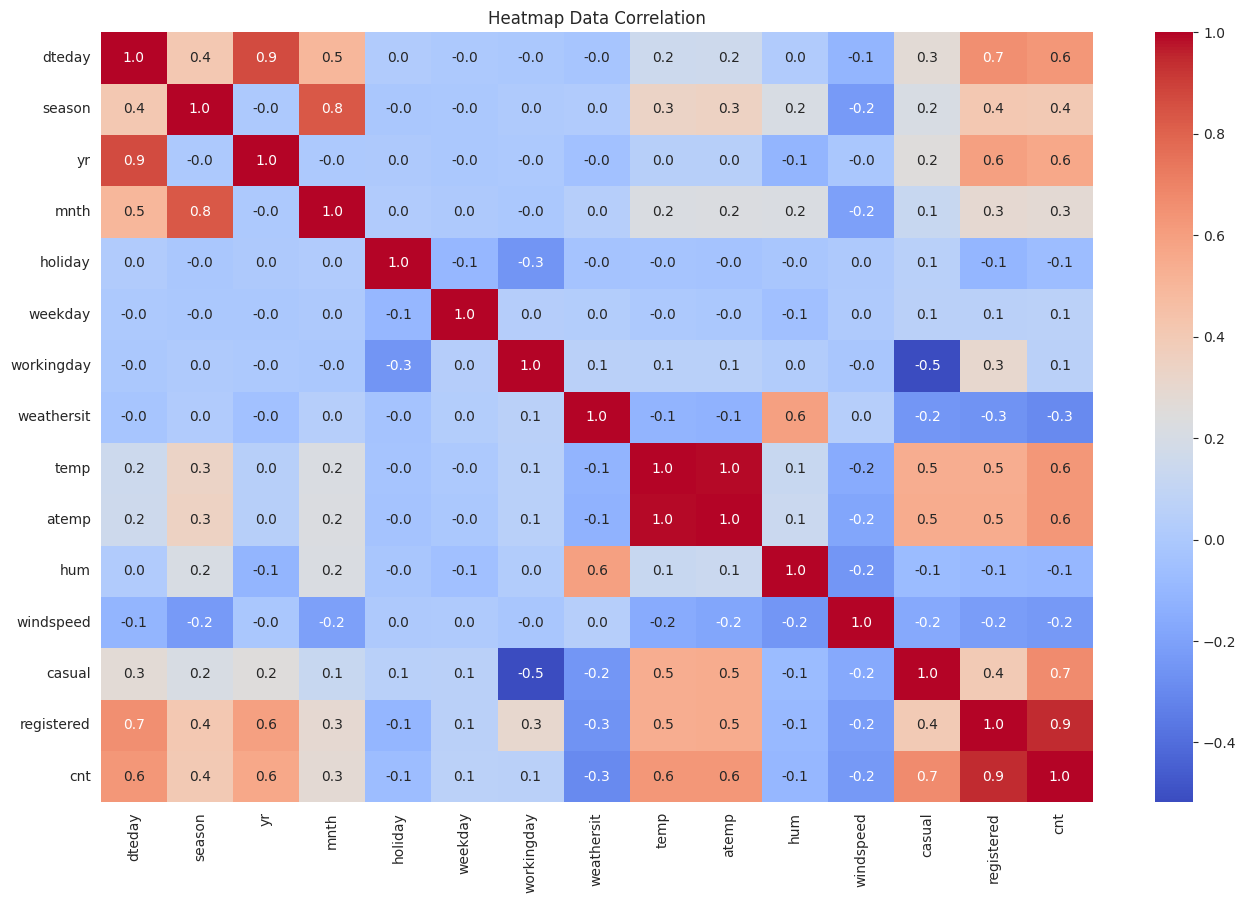

In [ ]:
corr = df_day.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, fmt=".1f", cmap='coolwarm')
plt.title("Heatmap Data Correlation")
plt.show()

- Suhu (temp dan atemp) adalah faktor penting yang memengaruhi jumlah penyewaan sepeda. Kondisi suhu yang nyaman mendorong lebih banyak penyewa sepeda.
- Variabel seperti holiday, windspeed, dan weekday memiliki pengaruh minimal terhadap jumlah penyewa sepeda.

In [ ]:
df_day.groupby(by="season").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday   cnt                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261

season (1:springer, 2:summer, 3:fall, 4:winter)

Penyewa sepeda paling banyak pada musim gugur sedangkan paling sedikit pada musim semi.

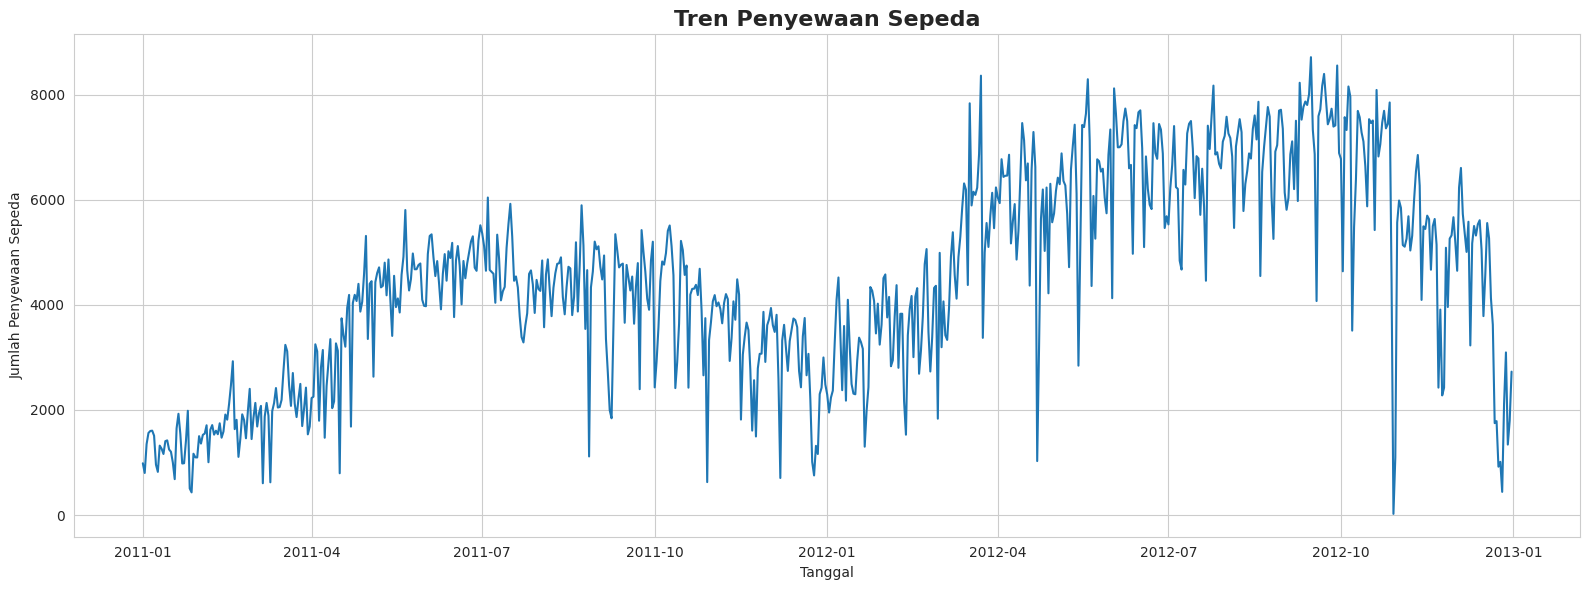

In [ ]:
plt.figure(figsize=(16,6))

sns.lineplot(data=df_day, x='dteday', y='cnt')

plt.title('Tren Penyewaan Sepeda', fontweight='bold', fontsize=16)
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.tight_layout()
plt.show()

Pada awal tahun penyewaan rendah tetapi tren bulan berikutnya meningkat hingga kira-kira pertengahan tahun, hal ini terjadi setiap awal tahun. Lalu tren menurun ketika mendekati akhir tahun.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa persentasi perbandingan antara penyewa yang terdaftar dan tidak?

In [ ]:
df_grouped = df_day.groupby('yr')[['registered', 'casual']].sum().reset_index()
df_grouped['yr'] = df_grouped['yr'].map({0: '2011', 1: '2012'})
df_grouped

,yr,registered,casual
0,2011,995851,247252
1,2012,1676811,372765


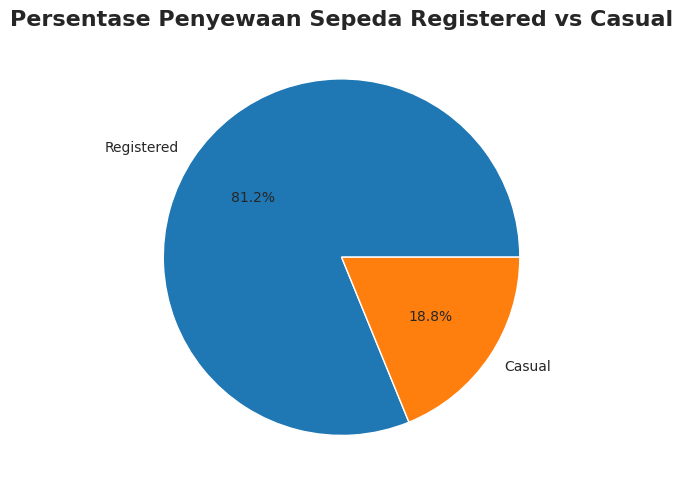

In [ ]:
tot_registered = df_day['registered'].sum()
tot_casual = df_day['casual'].sum()

total = [tot_registered, tot_casual]
labels = ['Registered', 'Casual']

plt.figure(figsize=(7, 5))
plt.pie(total, labels=labels, autopct='%1.1f%%')
plt.title('Persentase Penyewaan Sepeda Registered vs Casual', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

Penyewaan sepeda yang terdaftar mencapai 81.2% lebih banyak dari Casual. Pada tahun 2011 dan 2012 juga lebih banyak penyewa sepeda yang terdaftar.

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap jumlah penyewa sepeda?

weathersit :

		1: Clear, Few clouds, Partly cloudy, Partly cloudy
		2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [ ]:
df_day['weathersit'].unique()

array([2, 1, 3])

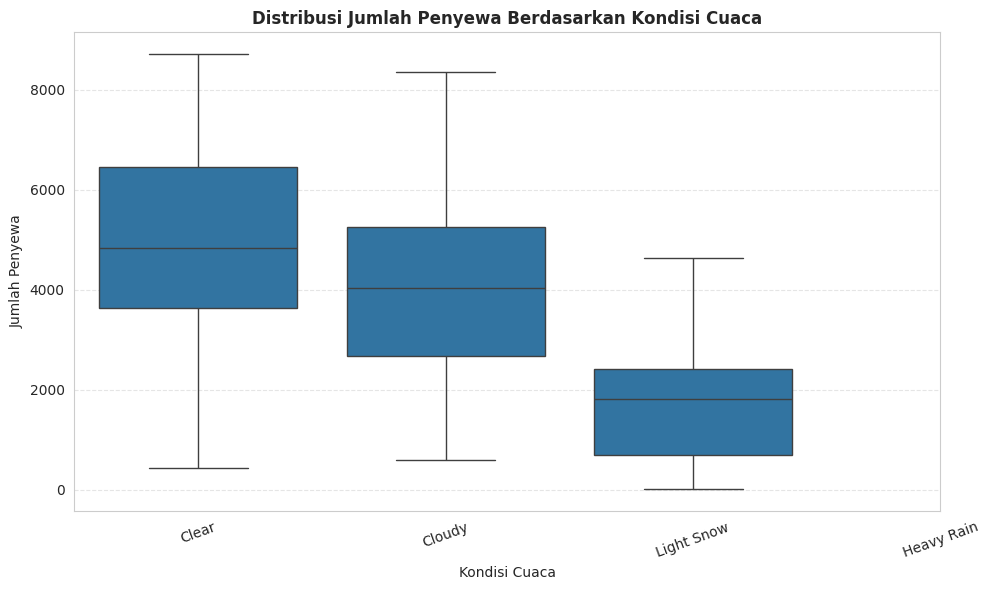

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=df_day)

plt.title('Distribusi Jumlah Penyewa Berdasarkan Kondisi Cuaca', fontweight='bold')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewa')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Cloudy', 'Light Snow', 'Heavy Rain'], rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Tidak ada penyewa sepeda pada cuaca yang sangat buruk (4). Penyewa lebih banyak pada kondisi cuaca yang cerah (1).

### Pertanyaan 3: Kapan waktu terbaik untuk meningkatkan pendapatan penyewaan sepeda?

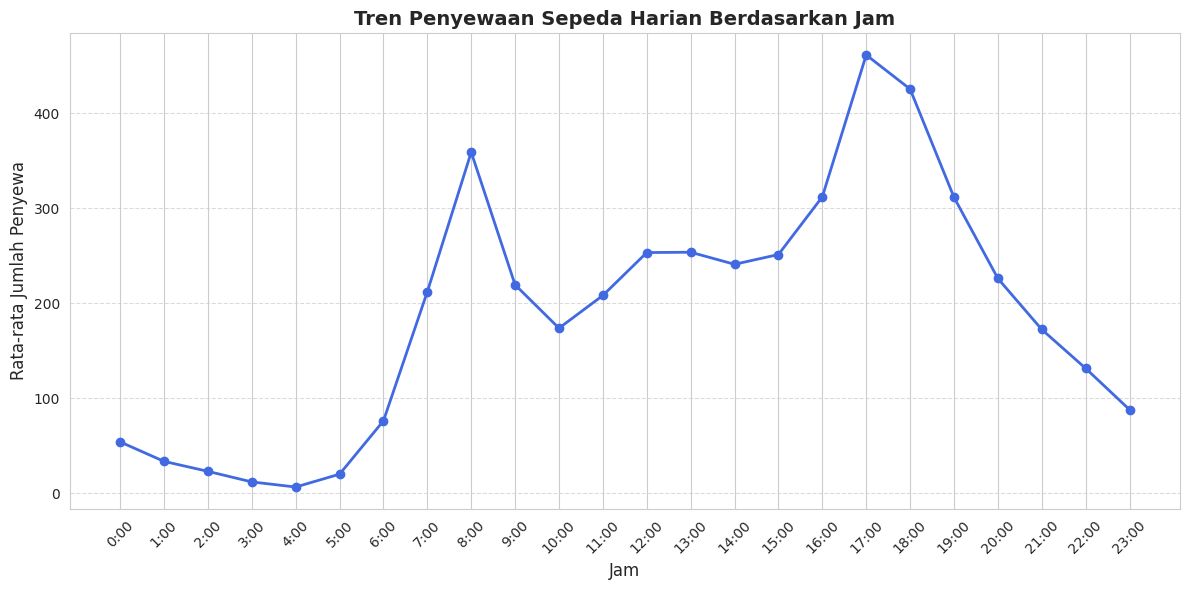

In [ ]:
# Jam

hourly_trend = df_hour.groupby('hr')['cnt'].mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_trend.index, hourly_trend.values,
         marker='o', linestyle='-', color='royalblue', linewidth=2)

plt.title('Tren Penyewaan Sepeda Harian Berdasarkan Jam', fontsize=14, fontweight='bold')
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewa', fontsize=12)
plt.xticks(range(0, 24), labels=[f"{i}:00" for i in range(24)], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Mulai jam 05.00 dan 15.00 terdapat peningkatan permintaan penyewaan sepeda. Terdapat kemungkinan bahwasanya pada jam tersebut seseorang berangkat dan pulang kerja. Pada jam tersebut adalah waktu yang baik untuk olahraga maupun menikmati suasana.

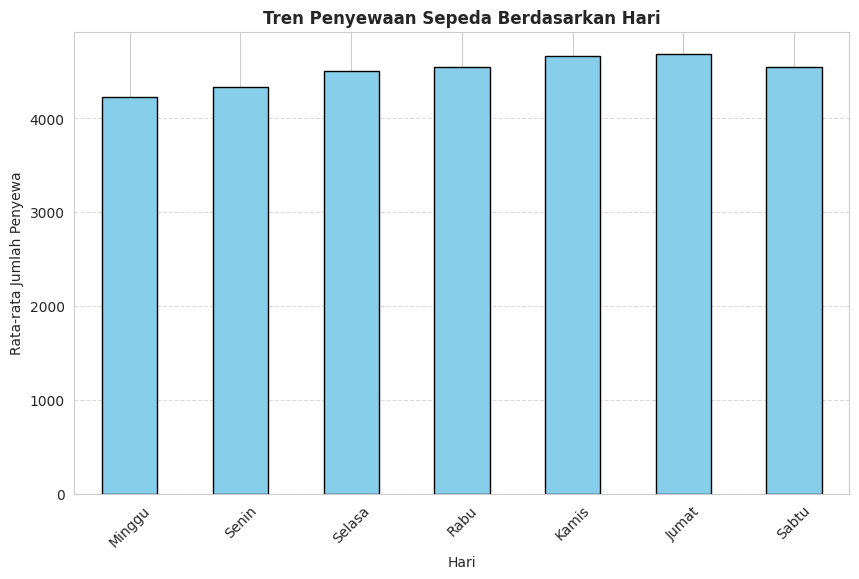

In [ ]:
# Hari

day_trend = df_day.groupby('weekday')['cnt'].mean()

day_trend.index = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']

plt.figure(figsize=(10, 6))
day_trend.plot(kind='bar', color='skyblue', edgecolor='k')
plt.title('Tren Penyewaan Sepeda Berdasarkan Hari', fontweight='bold')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Jumlah Penyewa')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Tidak ada perbedaan signifikan penyewa sepeda berdasarkan hari.

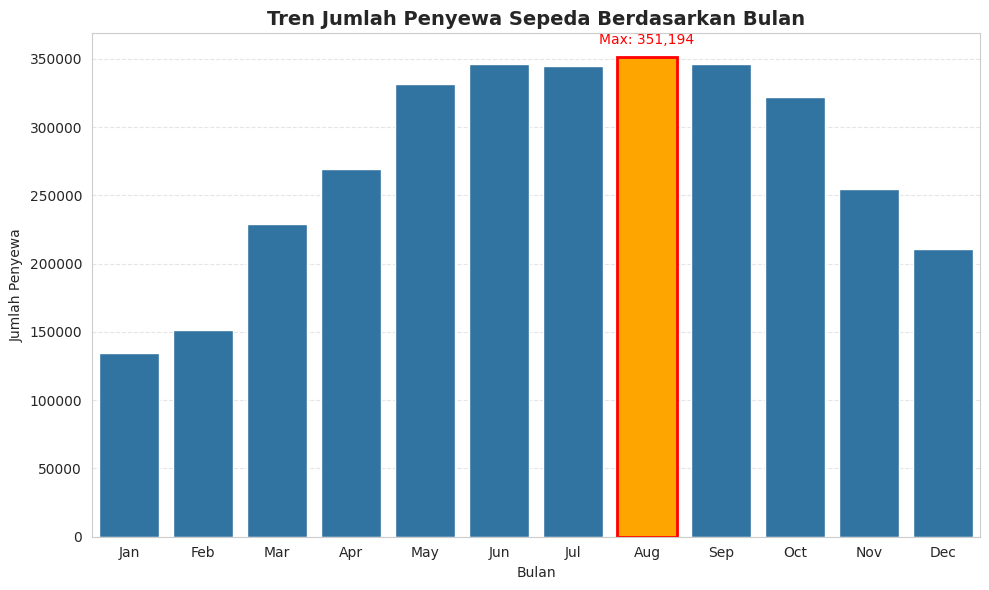

In [ ]:
# Bulan

monthly_trend = df_day.groupby('mnth')['cnt'].sum().reset_index()
max_month = monthly_trend.loc[monthly_trend['cnt'].idxmax()]

plt.figure(figsize=(10, 6))
bars = sns.barplot(x='mnth', y='cnt', data=monthly_trend)

for bar, month, count in zip(bars.patches, monthly_trend['mnth'], monthly_trend['cnt']):
    if month == max_month['mnth']:
        bar.set_facecolor('orange')
        bar.set_edgecolor('red')
        bar.set_linewidth(2)

plt.text(max_month['mnth']-1, max_month['cnt'] + 10000,
         f"Max: {max_month['cnt']:,}", color='red', fontsize=10, ha='center')

plt.title('Tren Jumlah Penyewa Sepeda Berdasarkan Bulan', fontsize=14, fontweight='bold')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewa')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Penyewa lebih banyak pada bulan Juni - September. Dimana puncak sewa terbanyak terdapat pada bulan Agustus yakni 351.194 penyewaan. Sedangkan terendah pada bulan Januari - Februari.

### Analisis Lanjutan (Opsional)

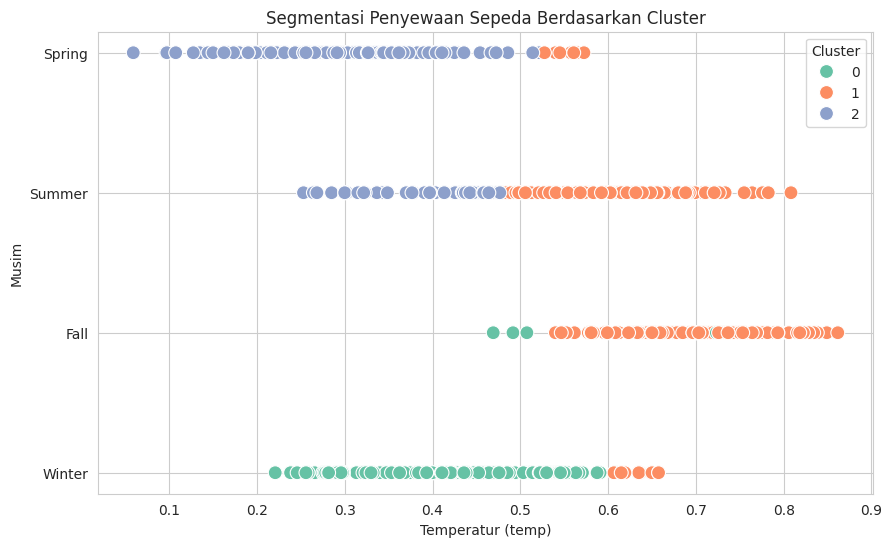

Centroids of the clusters:
[[-0.46174229 -0.43451802  1.33317823]
 [ 0.92778814  0.91723786  0.09969913]
 [-0.99392037 -0.99885943 -1.12887266]]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = ['temp', 'atemp', 'season']
X = df_day[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)

df_day['cluster'] = kmeans.fit_predict(X_scaled)

season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_day['season_label'] = df_day['season'].map(season_map)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='season_label', hue='cluster', palette='Set2', data=df_day, s=100)
plt.title('Segmentasi Penyewaan Sepeda Berdasarkan Cluster')
plt.xlabel('Temperatur (temp)')
plt.ylabel('Musim')
plt.legend(title='Cluster', loc='upper right')
plt.show()

print("Centroids of the clusters:")
print(kmeans.cluster_centers_)

1. Cluster 0 : [-0.46174229 -0.43451802  1.33317823] Cluster ini didominasi oleh pengguna dengan temperatur rendah, feeling temperature yang juga rendah, dan musim yang cenderung ke musim Winter (4).

2. Cluster 1 : [ 0.92778814  0.91723786  0.09969913] Cluster ini memiliki pengguna dengan temperatur dan feeling temperature yang lebih tinggi, dengan sedikit kecenderungan ke musim Summer (2) dan fall (3).

3. Cluster 2 : [-0.99392037 -0.99885943 -1.12887266] Cluster ini didominasi oleh pengguna dengan temperatur dan feeling temperature yang sangat rendah, serta cenderung ke musim Spring (1).

## Conclusion

- Sebanyak 81.2% penyewa sepeda yang terdaftar. Hal ini baik jika ingin melihat kondisi customer untuk memberikan program dengan melakukan segmentasi customer.
- Penyewa sepeda cenderung menyewa ketika cuaca sedang cerah, penyewaan sedang pada cuaca berawan, dan sedikit ketika kondisi salju ringan. Tidak ada penyewa pada saat hujan lebat
- Ketika jam 05.00 - 08.00 serta 15.00 - 17.00 dimana pada jam tersebut adalah waktu untuk berangkat maupun pulang bekerja. Tidak hanya itu pada waktu tersebut terdapat beberapa orang yang melakukan olahraga atau santai menikmati keindahan. Sedangkan jika dilihat pada sisi bulan, periode Juni - September merupakan bulan dengan penyewa sepeda terbanyak.